# Data exploration

Lets take a look at the Melbourne pedestrian data and see what we think

In [1]:
import datetime

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

from IPython.core.display import Javascript
from IPython.display import HTML

import tqdm.notebook as tqdm

from ipyleaflet import Map, Marker,AwesomeIcon, Circle, Popup, LegendControl
from ipywidgets import HTML

import statsmodels.api as sm

from PedestrianDataImporter import getHourlyCounts
from MissingDataUtils import findMissingness, plotMissing
from DataFrameManipulations import countsLongToWideHourly,countsLongToWideDaily
from Imputation import repairRepeatedMidnightStamps

In [2]:
# Also disable the scroll. I just don't like it
def disable_scroll():
    display(Javascript("""
        IPython.OutputArea.prototype._should_scroll = function(lines) {
            return false;
        }
    """))

disable_scroll()

<IPython.core.display.Javascript object>

In [3]:
df_counts,df_locations = getHourlyCounts['Melbourne']()
df_counts = repairRepeatedMidnightStamps(df_counts)
df_wide   = countsLongToWideHourly(df_counts)

Loading Melbourne_stored.pkl


In [4]:
df_counts

ID  Location_ID                  LocationName  HourlyCount  \
0        2887628           34          Flinders St-Spark La          300   
1        2887629           39                  Alfred Place          604   
2        2887630           37               Lygon St (East)          216   
3        2887631           40  Lonsdale St-Spring St (West)          627   
4        2887632           36               Queen St (West)          774   
...          ...          ...                           ...          ...   
4562225  4567697           87               Errol St (West)          185   
4562226  4567698           87               Errol St (West)          108   
4562227  4567699           87               Errol St (West)           58   
4562228  4567700           87               Errol St (West)           18   
4562229  4567701           87               Errol St (West)           27   

                   DateTime  
0       2019-11-01 17:00:00  
1       2019-11-01 17:00:00  
2       2019-11-01 17:00:00  
3       2019-11-01 17:00:00  
4       2019-11-01 17:00:00  
...                     ...  
4562225 2022-10-31 19:00:00  
4562226 2022-10-31 20:00:00  
4562227 2022-10-31 21:00:00  
4562228 2022-10-31 22:00:00  
4562229 2022-10-31 23:00:00  

[4562230 rows x 5 columns]

In [5]:
df_wide

LocationName         231 Bourke St  Alfred Place  Australia on Collins  \
DateTime                                                                 
2009-05-01 00:00:00            NaN           NaN                  22.0   
2009-05-01 01:00:00            NaN           NaN                  16.0   
2009-05-01 02:00:00            NaN           NaN                   4.0   
2009-05-01 03:00:00            NaN           NaN                   2.0   
2009-05-01 04:00:00            NaN           NaN                  12.0   
...                            ...           ...                   ...   
2022-10-31 19:00:00          423.0         135.0                   NaN   
2022-10-31 20:00:00           24.0         147.0                   NaN   
2022-10-31 21:00:00            4.0         157.0                   NaN   
2022-10-31 22:00:00            0.0          75.0                   NaN   
2022-10-31 23:00:00           22.0          67.0                   NaN   

LocationName         Birrarung Marr  Bourke St - Spencer St (North)  \
DateTime                                                              
2009-05-01 00:00:00             NaN                             NaN   
2009-05-01 01:00:00             NaN                             NaN   
2009-05-01 02:00:00             NaN                             NaN   
2009-05-01 03:00:00             NaN                             NaN   
2009-05-01 04:00:00             NaN                             NaN   
...                             ...                             ...   
2022-10-31 19:00:00             NaN                           497.0   
2022-10-31 20:00:00             NaN                           378.0   
2022-10-31 21:00:00             NaN                           372.0   
2022-10-31 22:00:00             NaN                           292.0   
2022-10-31 23:00:00             NaN                           252.0   

LocationName         Bourke St - Spencer St (South)  Bourke St Bridge  \
DateTime                                                                
2009-05-01 00:00:00                             NaN               NaN   
2009-05-01 01:00:00                             NaN               NaN   
2009-05-01 02:00:00                             NaN               NaN   
2009-05-01 03:00:00                             NaN               NaN   
2009-05-01 04:00:00                             NaN               NaN   
...                                             ...               ...   
2022-10-31 19:00:00                             NaN              82.0   
2022-10-31 20:00:00                             NaN              43.0   
2022-10-31 21:00:00                             NaN              41.0   
2022-10-31 22:00:00                             NaN              45.0   
2022-10-31 23:00:00                             NaN              38.0   

LocationName         Bourke St-Russell St (West)  Bourke Street Mall (North)  \
DateTime                                                                       
2009-05-01 00:00:00                          NaN                        53.0   
2009-05-01 01:00:00                          NaN                        43.0   
2009-05-01 02:00:00                          NaN                        10.0   
2009-05-01 03:00:00                          NaN                         5.0   
2009-05-01 04:00:00                          NaN                        25.0   
...                                          ...                         ...   
2022-10-31 19:00:00                        758.0                       978.0   
2022-10-31 20:00:00                        730.0                       428.0   
2022-10-31 21:00:00                        712.0                       338.0   
2022-10-31 22:00:00                        595.0                       211.0   
2022-10-31 23:00:00                        464.0                       158.0   

LocationName         Bourke Street Mall (South)  ...  \
DateTime                                         ...   
2009-05-01

Closer inspection of the dataframes reveals that
* Not all the locations in the counts dataframe have locations in the locations dataframe.
* Not all the location in the locations dataframe have a record in the counts dataframe

In [6]:
df_counts['DateTime'].min()

Timestamp('2009-05-01 00:00:00')

In [7]:
l1 = df_counts['LocationName']
l2 = df_locations['Location_Desc']

print(f"{l1.nunique()} unique locations in count")
print(f"{l2.shape[0]} rows in location" )
print(f"{l2.nunique()} in counts")
print()

inBoth = list( set(l1).intersection(l2) )
justL1 = list( set(l1) - set(l2))
justL2 = list( set(l2) - set(l1))

print(f"{len(inBoth)} in both sets")
print(f"{len(justL1)} just in count data")
print(f"{len(justL2)} just in location data")

94 unique locations in count
138 rows in location
135 in counts

66 in both sets
28 just in count data
69 just in location data


What are the reasons for the duplicated location data?
* Birrarund Marr seems to have two sensors, one for pedestrians and one for bicycles
* Birrarung Marr East - Batman Ave Bridge Entry has two sensors in different directions.
* Harbour Esplanade just seems to be repeated twice.

In [8]:
duplicate_rows = df_locations[df_locations['Location_Desc'].duplicated(keep=False)]
duplicate_rows = duplicate_rows.sort_values('Location_Desc')
duplicate_rows

Location_ID                                  Location_Desc  Sensor_Name  \
39             7                                 Birrarung Marr     FedPed_T   
124          122                                 Birrarung Marr   FedCycle_T   
81           123  Birrarung Marr East - Batman Ave Bridge Entry  BirBridge_T   
125          124  Birrarung Marr East - Batman Ave Bridge Entry  BirBridge_T   
27           120                              Harbour Esplanade   HarbBlix_T   
122          111                              Harbour Esplanade   HarbBlix_T   

    Installation_Date    Note Location_Type Status Direction_1 Direction_2  \
39         2014-12-17     NaN       Outdoor      A        East        West   
124        2022-08-23     NaN       Outdoor      A        East        West   
81         2023-06-02  <Null>       Outdoor      A        East        West   
125        2023-06-02     NaN       Outdoor      A       North       South   
27         2021-03-25     NaN  Outdoor Blix      A         NaN         NaN   
122        2021-03-25     NaN  Outdoor Blix      A         NaN         NaN   

      Latitude   Longitude                    Location  
39  -37.818629  144.971694  -37.81862929, 144.97169395  
124 -37.818629  144.971694  -37.81862929, 144.97169395  
81  -37.817537  144.973297  -37.81753741, 144.97329734  
125 -37.817574  144.973299  -37.81757416, 144.97329934  
27  -37.814426  144.944366  -37.81442577, 144.94436558  
122 -37.814426  144.944366  -37.81442577, 144.94436558

Only one site seems to seems to be counting bicycles

In [9]:
df_locations.loc[ df_locations['Sensor_Name'].str.contains('Cycle', case=False, na=False) ]

Location_ID   Location_Desc Sensor_Name Installation_Date Note  \
124          122  Birrarung Marr  FedCycle_T        2022-08-23  NaN   

    Location_Type Status Direction_1 Direction_2   Latitude   Longitude  \
124       Outdoor      A        East        West -37.818629  144.971694   

                       Location  
124  -37.81862929, 144.97169395

## Site locations

First lets plot the sensor locations. Mouse of the icon to get the name of the sensor location

In [10]:
def showSensorLocations(df_locations,zoom=13):
    center = (df_locations['Latitude'].median(), df_locations['Longitude'].median())
    m = Map(center=center, zoom=zoom)
    icon=AwesomeIcon(name="map-pin", marker_color='red',icon_size=2)
    for index,row in df_locations.iterrows():
        marker = Marker(location=(row['Latitude'],row['Longitude']),
                        icon=icon,
                        draggable=False,opacity=1.0,
                        title=f"{row['Location_Desc']} - {row['Location_ID']}"
                        )
        m.add_layer(marker)
    display(m)
    
showSensorLocations(df_locations)

Map(center=[-37.814329845, 144.96255987], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_…

In [11]:
# Locations of the four case study sensors used in the paper
case_studies=["Monash Rd-Swanston St (West)", "New Quay", "Southbank", "Southern Cross Station"]

def showSensorLocations2(df_locations,zoom=14):
    center = (df_locations['Latitude'].median(), df_locations['Longitude'].median())
    m = Map(center=center, zoom=zoom,zoom_control=False)
    #m = Map()
    m.layout.width = '800px'
    m.layout.height = '800px'
    for index,row in df_locations.iterrows():
        circle = Circle()
        circle.location = (row['Latitude'],row['Longitude'])
        if row['Location_Desc'] in case_studies:
            circle.radius = 20
            circle.color = "blue"
            circle.fill_color = "blue"
            message = HTML()
            message.value = f"<div style='color: white; font-size: 12px; padding: 2px; background: rgba(0, 0, 0, 0.4); border: none;'>{row['Location_Desc']}</div>"
            popup = Popup(location=circle.location, child=message, close_button=False, auto_close=False, close_on_escape_key=False)
            m.add_layer(popup)
        else:
            circle.radius = 20
            circle.color = "red"
            circle.fill_color = "red"
        m.add_layer(circle)
    display(m)
    return m
    
    
m = showSensorLocations2(df_locations)
#m.save('map.html')
#m.save('map.pdf')

Map(center=[-37.814329845, 144.96255987], controls=(AttributionControl(options=['position', 'prefix'], positio…

In [12]:
# Locations of the four case study sensors used in the paper
case_studies=["Monash Rd-Swanston St (West)", "New Quay", "Southbank", "Southern Cross Station"]

def showSensorLocations2(df_locations,zoom=14):
    center = (df_locations['Latitude'].mean(), df_locations['Longitude'].mean())
    m = Map(center=center, zoom=zoom, zoom_control=False)
    m.layout.width = '900px'
    m.layout.height = '900px'  # Adjust size for better visibility

    # Define colors for each specified location
    location_colours = {name:colour for name,colour in zip(case_studies, ["green","purple","blue","orange"])}

    # Legend setup
    legend = LegendControl(
        location_colours,
        name="Location",
        position="topright"
    )
    m.add_control(legend)
    # Custom CSS to increase legend text size
    style = "<style>.leaflet-control-layers-expanded {font-size: 20px;}</style>" 
    display(HTML(style))

    for index, row in df_locations.iterrows():
        color = location_colours.get(row['Location_Desc'], 'red')  # Default color is red for unspecified locations
        circle = Circle()
        circle.location = (row['Latitude'], row['Longitude'])
        circle.radius = 40 if row['Location_Desc'] in case_studies else 20  # Larger radius for case study locations 
        circle.color = color
        circle.fill_color = color
        circle.fill_opacity = 1

        m.add_layer(circle)

    display(m)
    return m

# Example usage with a DataFrame 'df_locations'
m = showSensorLocations2(df_locations)
m.save('map.html')
# NOTE: to make map.png need to open the map in a browser and take a screenshot

HTML(value='<style>.leaflet-control-layers-expanded {font-size: 20px;}</style>')

Map(center=[-37.813061831014494, 144.96104921949276], controls=(AttributionControl(options=['position', 'prefi…

In [13]:
df_locations['Location_Desc'].unique()

array(['Spencer St-Collins St (North)',
       'Melbourne Convention Exhibition Centre', 'Queen St (West)',
       'Lygon St (East)', 'Flinders La-Swanston St (West)',
       'Little Collins St-Swanston St (East)', 'Pelham St (South)',
       'QVM-Therry St (South)', 'Faraday St-Lygon St (West)',
       'Elizabeth St-Lonsdale St (South)',
       'Lonsdale St - Elizabeth St (North)', 'Swanston St - City Square',
       'State Library - New', 'Flinders Ln -Degraves St (South)',
       'Flinders Ln -Degraves St (North)', 'Errol Street (East)',
       'Spring St- Flinders st (West)',
       'Harbour Esplanade (West) - Pedestrian path',
       'Library at The Dock-North side', 'East Melbourne Library',
       'Fitzroy Garden Visitor Centre External',
       'Town Hall Visitor Centre', 'North Melbourne Library',
       'Kathleen Syme Library Cafe', 'Flagstaff station (East)',
       'La Trobe St- William St (South)', 'Birrarung Marr East Entry',
       'Harbour Esplanade', 'I-Hub 892 Collins

## Inspecting missing data

  0%|          | 0/94 [00:00<?, ?it/s]

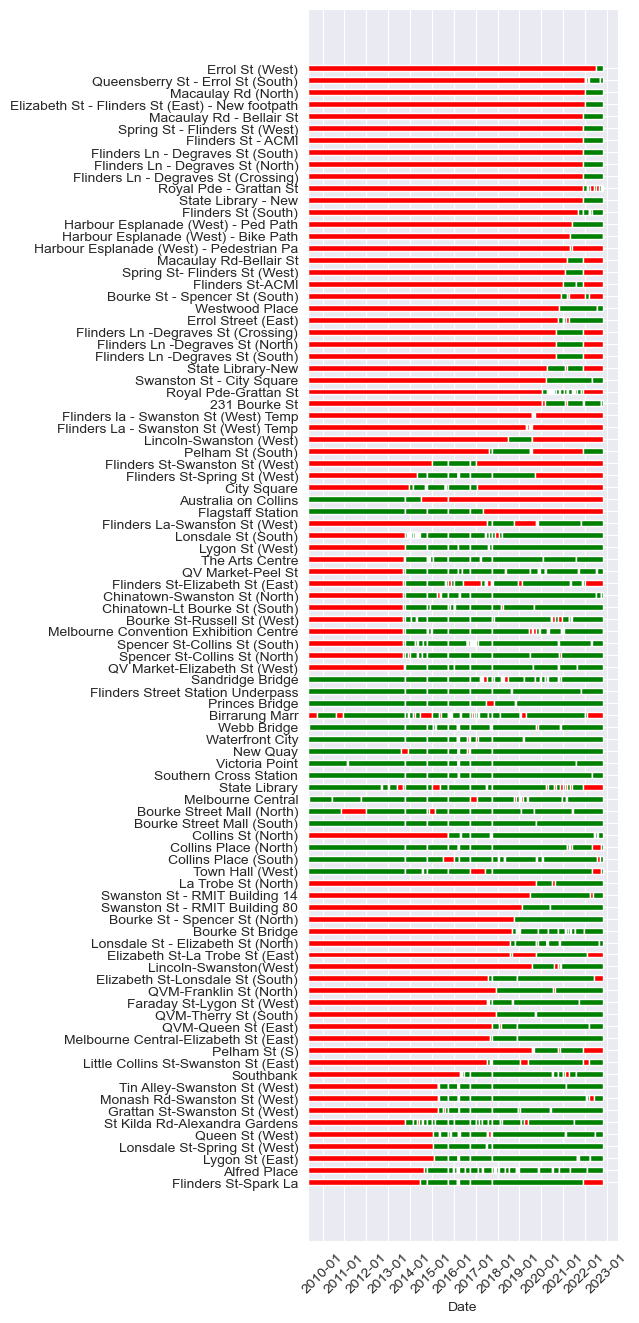

In [14]:
locations = df_counts['LocationName'].unique()
gaps_d = {location:findMissingness(df_wide,location) for location in tqdm.tqdm(locations)}
fig, ax = plt.subplots(figsize=(4,16))
plotMissing(gaps_d,ax)

Anticipating a future requirement lets take a look at which sites have a complete day of data

In [15]:
# Create a copy of df_counts
df_copy = df_counts.copy()
df_copy['DateTime'] = pd.to_datetime(df_copy['DateTime'])
df_copy['Date'] = df_copy['DateTime'].dt.date
df_daily = df_copy.groupby(['LocationName', 'Date']).agg({'HourlyCount': 'sum'}).rename(columns={'HourlyCount': 'DailyCount'})
df_daily.reset_index(inplace=True)
df_daily['DateTime'] = pd.to_datetime(df_daily['Date'])

In [16]:
df_daily

LocationName        Date  DailyCount   DateTime
0        231 Bourke St  2020-01-08       13521 2020-01-08
1        231 Bourke St  2020-01-09       15266 2020-01-09
2        231 Bourke St  2020-01-10       14463 2020-01-10
3        231 Bourke St  2020-01-11       12660 2020-01-11
4        231 Bourke St  2020-01-12       10097 2020-01-12
...                ...         ...         ...        ...
190126  Westwood Place  2022-10-27         796 2022-10-27
190127  Westwood Place  2022-10-28         832 2022-10-28
190128  Westwood Place  2022-10-29         583 2022-10-29
190129  Westwood Place  2022-10-30         224 2022-10-30
190130  Westwood Place  2022-10-31         683 2022-10-31

[190131 rows x 4 columns]

In [17]:
df_daily_wide = countsLongToWideDaily(df_daily)

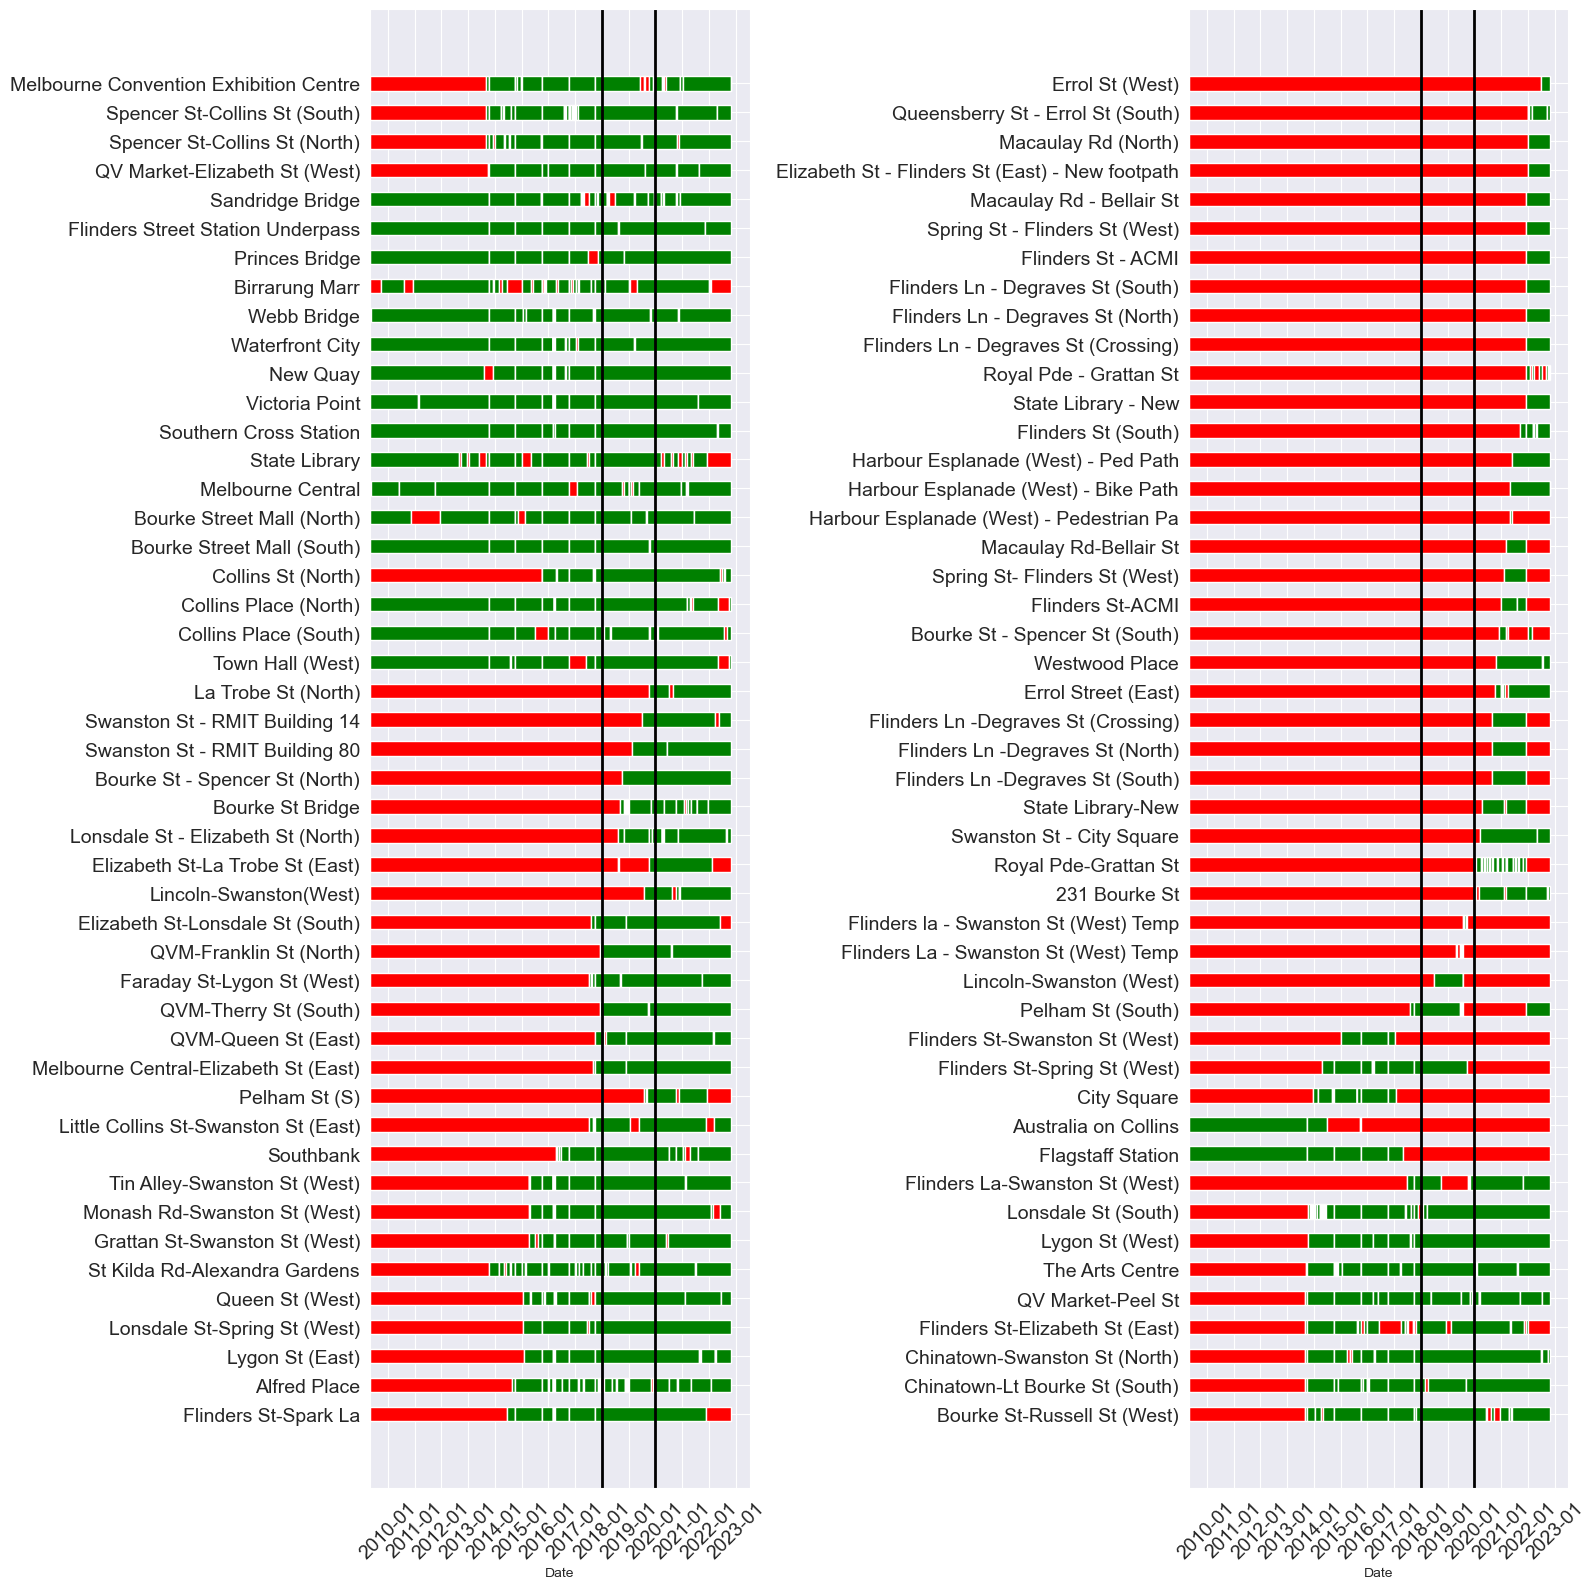

In [18]:
def split_dict(input_dict, n):
    """Splits a dictionary into n nearly equal parts."""
    if n <= 0:
        raise ValueError("Number of parts must be a positive integer")
    
    it = iter(input_dict)
    return [{k: input_dict[k] for k in itertools.islice(it, len(input_dict) // n + (1 if i < len(input_dict) % n else 0))} for i in range(n)]

gaps_d_split = split_dict(gaps_d,2)
len(gaps_d_split)
fig, axs = plt.subplots(1,2,figsize=(16,16))
plotMissing(gaps_d_split[0],axs[0])
plotMissing(gaps_d_split[1],axs[1])

start_date = datetime.datetime(2018, 1, 1)  # Start of 2018
end_date = datetime.datetime(2019, 12, 31)  # End of 2019

# Draw bold vertical lines
for ax in axs:
    ax.axvline(start_date, color='black', linewidth=2)  # Bold line at the start of 2018
    ax.axvline(end_date, color='black', linewidth=2)   # Bold line at the end of 2019
    # Setting the font size for tick labels
    ax.tick_params(axis='both', which='major', labelsize=14)  # Adjust '14' to your preferred font size


plt.tight_layout()
plt.savefig('Plots/EDA/AvailabilityDays.pdf')

## Inspection of the time series

Lets take a look at the sites which have complete data in 2018 and 2019

In [19]:
start_date = datetime.datetime(2018,1,1)
end_date   = datetime.datetime(2020,1,1)

cut = (df_wide.index >  start_date) & (df_wide.index < end_date ) 
df_cut = df_wide.loc[cut]
df_cut.dropna(axis='columns',how='any',inplace=True)
df_cut.index.freq = 'h'

/var/folders/c5/0t7n8_p15l9fy4jgfr1g6jr00000gn/T/ipykernel_10935/2682114126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut.dropna(axis='columns',how='any',inplace=True)


In [20]:
# Assuming df_cut is already defined and loaded with your data
# Resetting index to move datetime to a column
df_reset = df_cut.reset_index()

# Renaming the index column to 'datetime' if it's not already named
df_reset = df_reset.rename(columns={df_reset.columns[0]: 'datetime'})

# Melting the DataFrame to long-form
df_long = pd.melt(df_reset, id_vars='datetime', var_name='location', value_name='value')

df_long['year'] = df_long['datetime'].dt.year
df_long['week'] = df_long['datetime'].dt.isocalendar().week
df_long['year_week'] = df_long['year'].astype(str) + "-" + df_long['week'].astype(str).str.zfill(2)

# Normalizing datetime within each week
df_long['time_from_start_of_week'] = df_long['datetime'] - df_long['datetime'].dt.to_period('W').apply(lambda r: r.start_time)

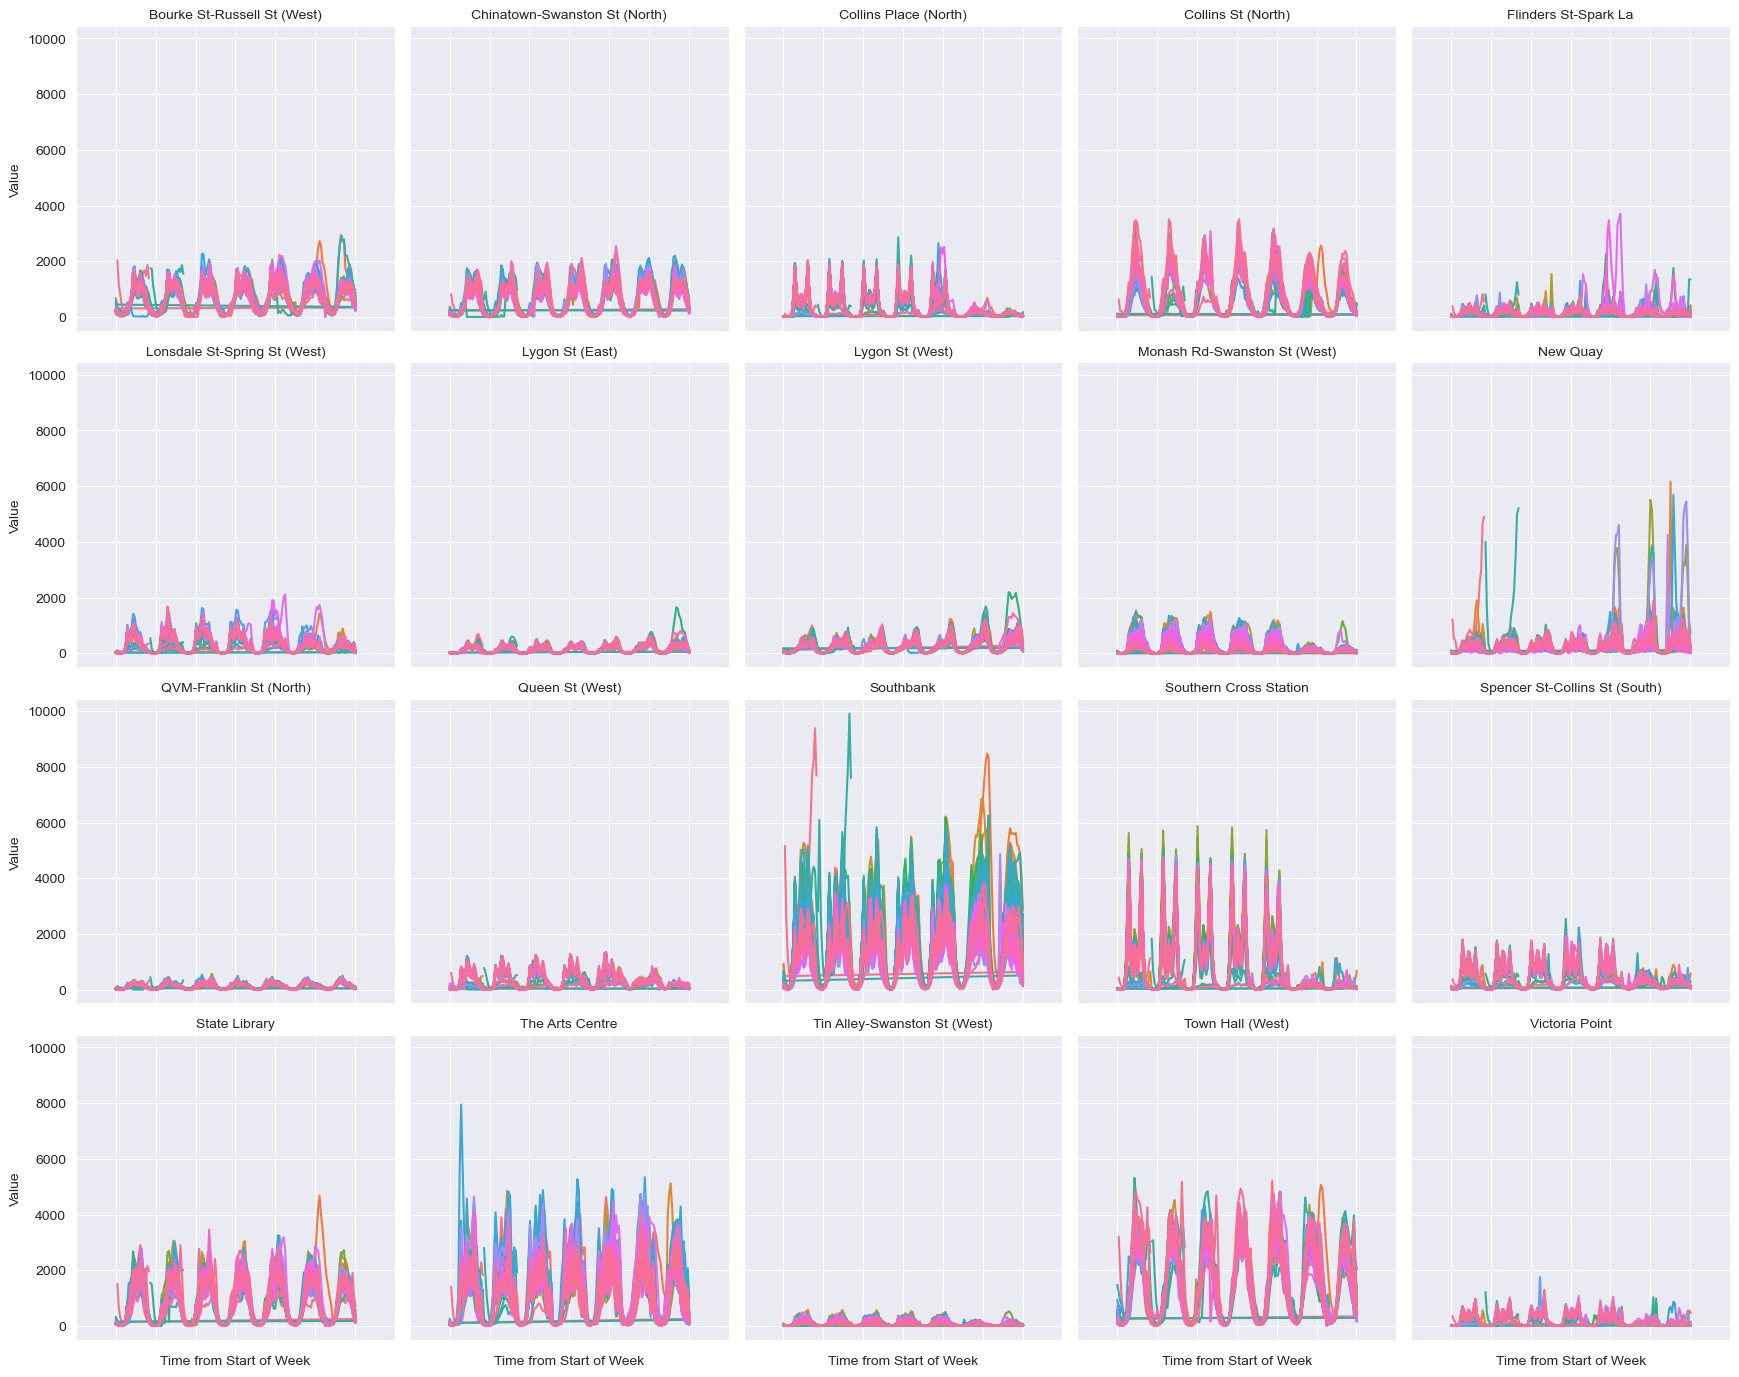

In [21]:
# Creating the FacetGrid
g = sns.FacetGrid(df_long, col="location", hue="year_week", col_wrap=5, height=3.5, palette="husl")
g = g.map(plt.plot, "time_from_start_of_week", "value")

# Adding labels, titles, and a legend
g.set_axis_labels("Time from Start of Week", "Value")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
#g.add_legend(title="Week")

#plt.show()
plt.savefig('WeeklyView.png', bbox_inches='tight')

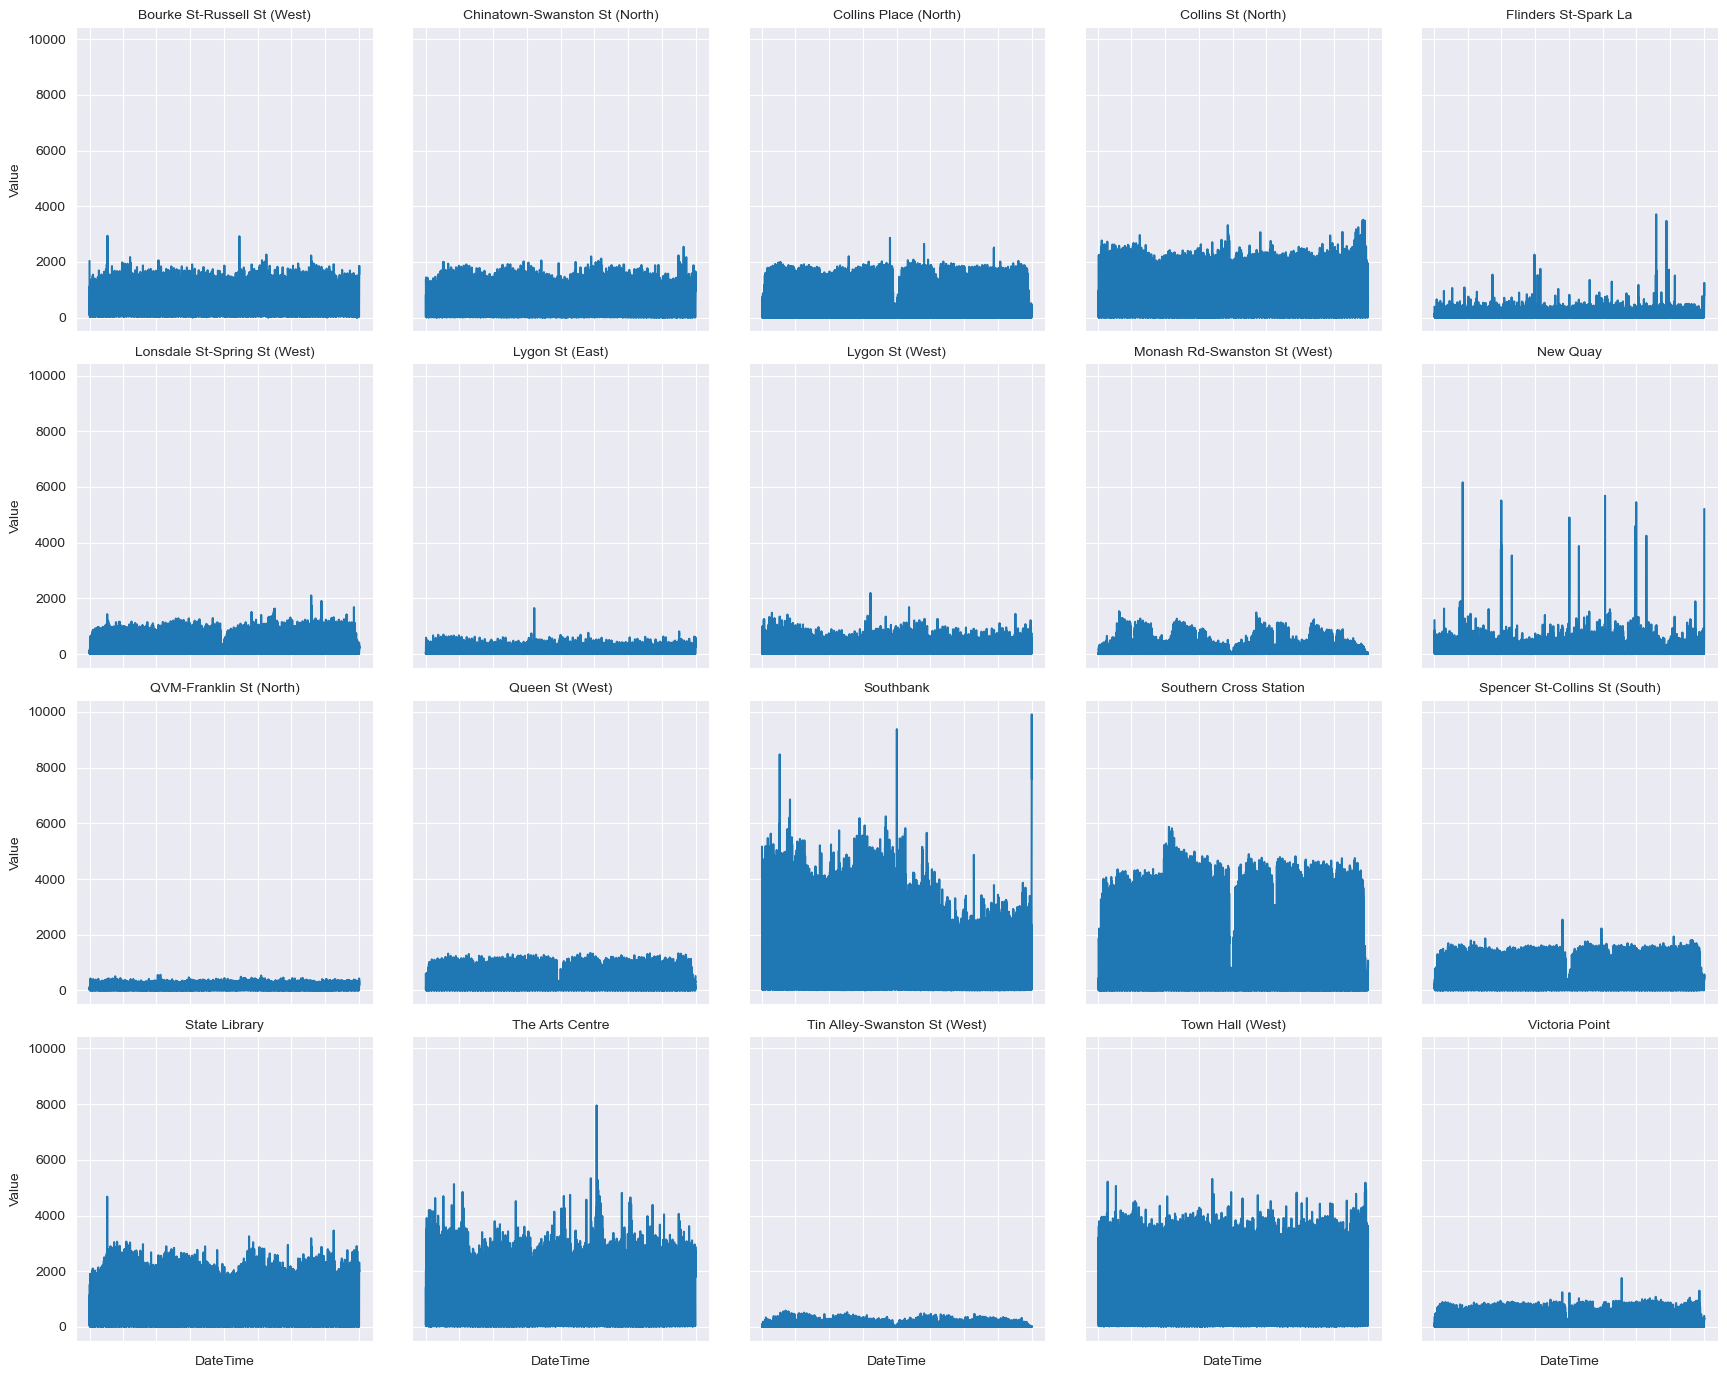

In [22]:
# Creating the FacetGrid
g = sns.FacetGrid(df_long, col="location", col_wrap=5, height=3.5)
g = g.map(plt.plot, "datetime", "value")

# Adding labels and titles
g.set_axis_labels("DateTime", "Value")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)

#plt.show()
plt.savefig('AnnualView.png', bbox_inches='tight')

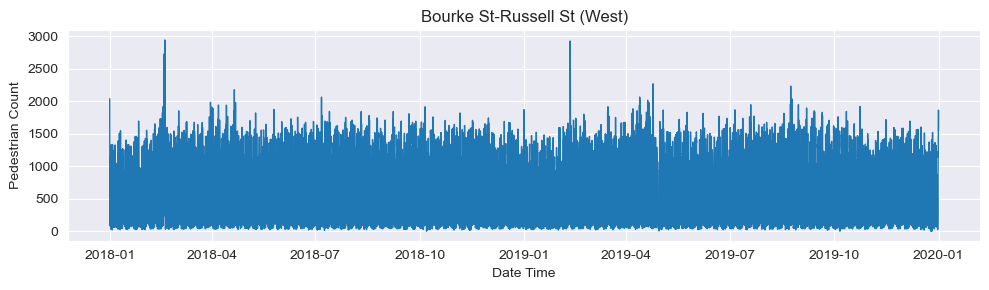

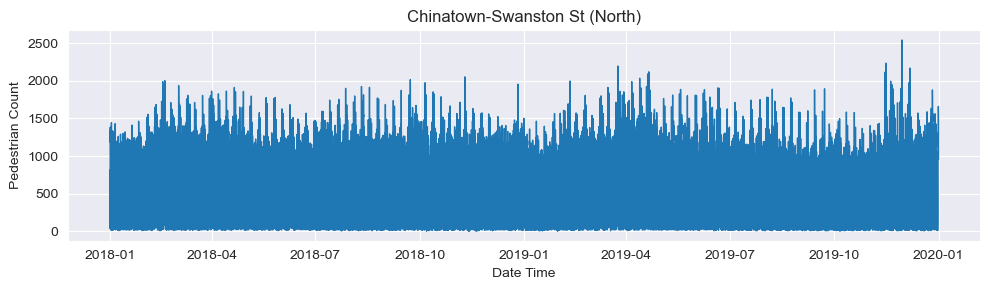

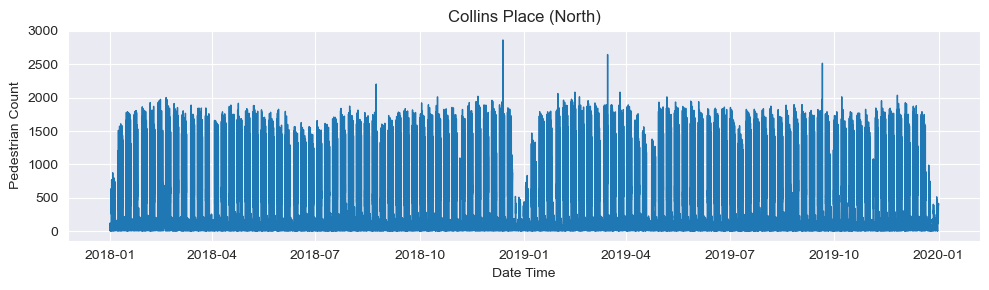

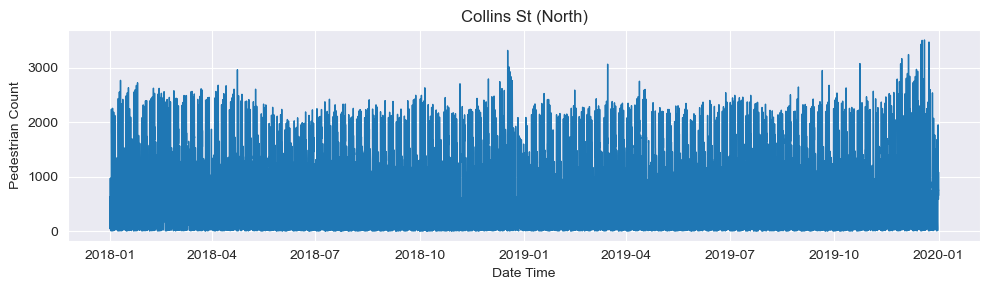

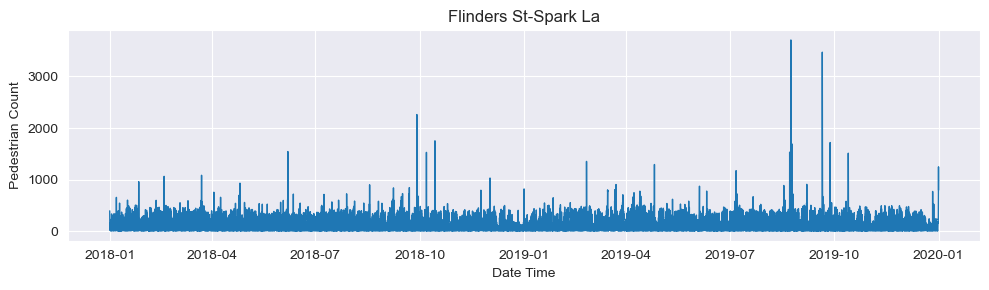

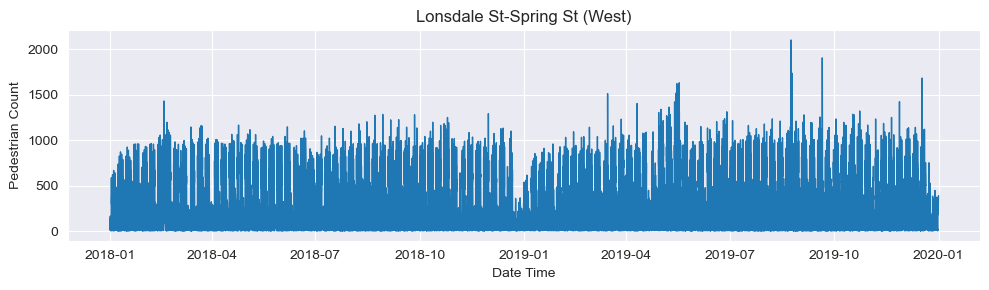

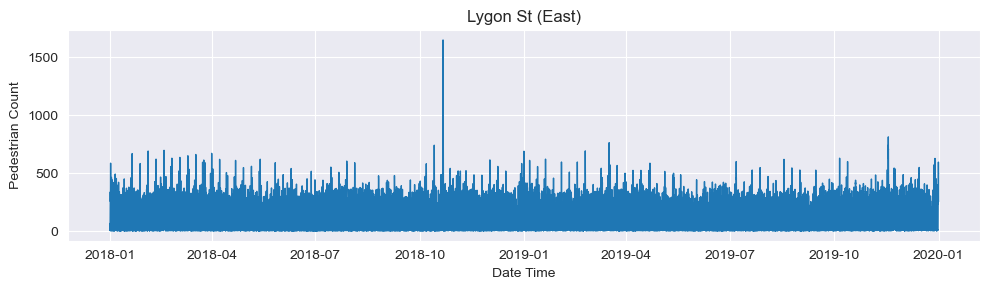

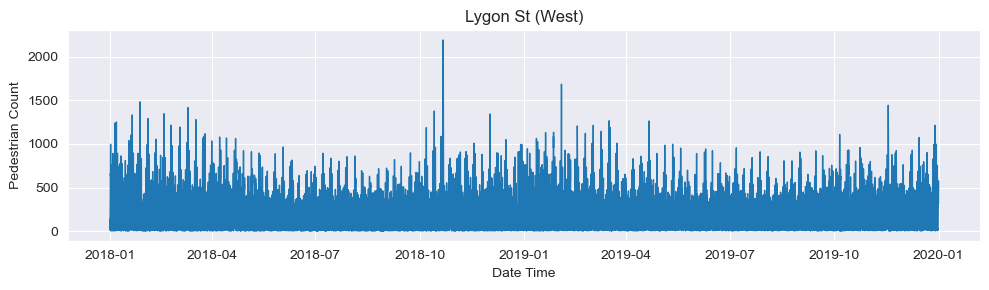

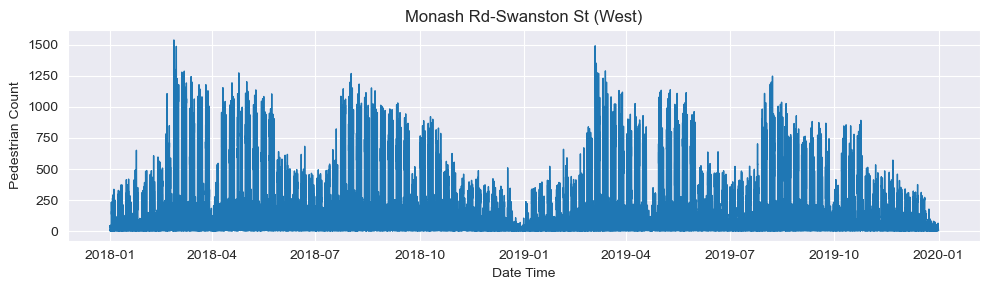

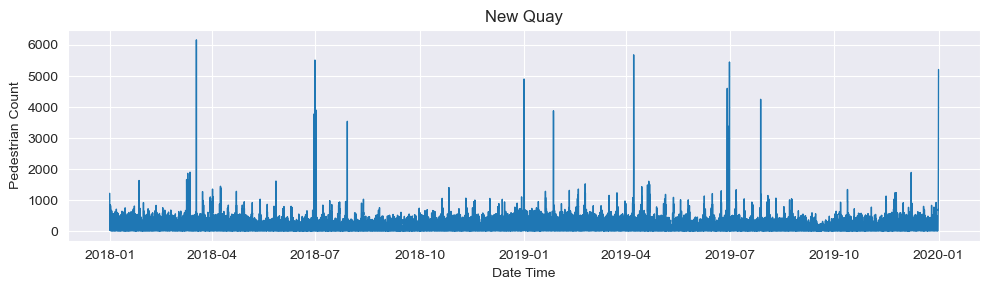

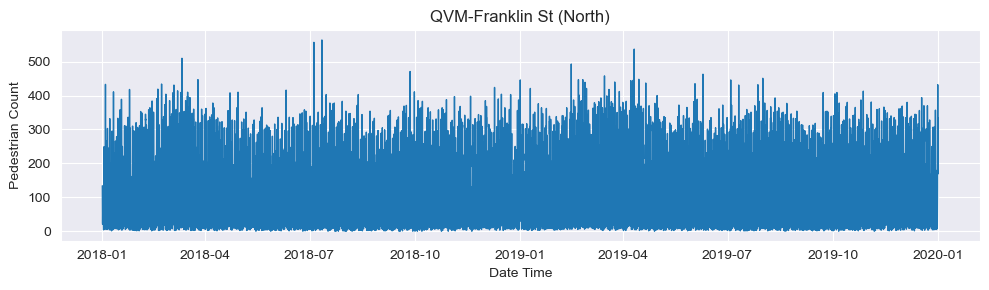

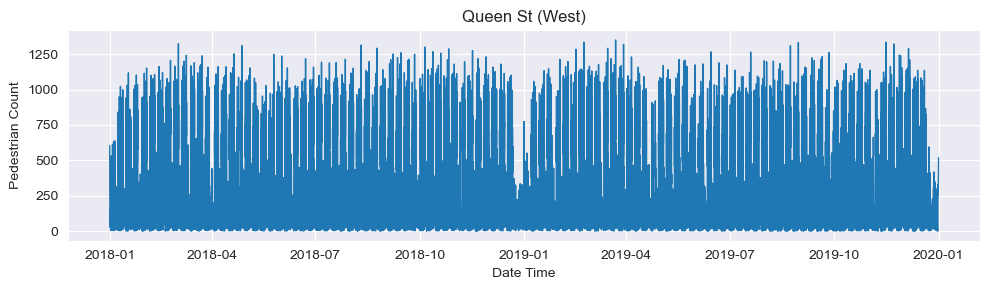

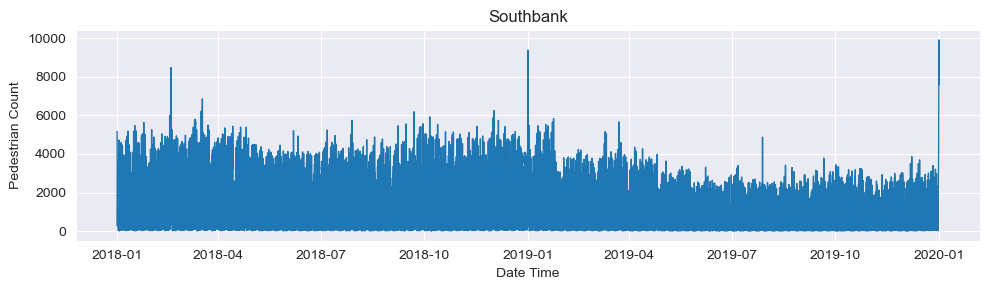

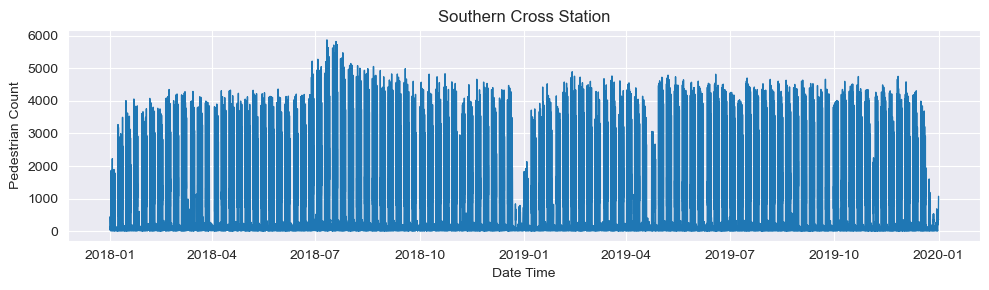

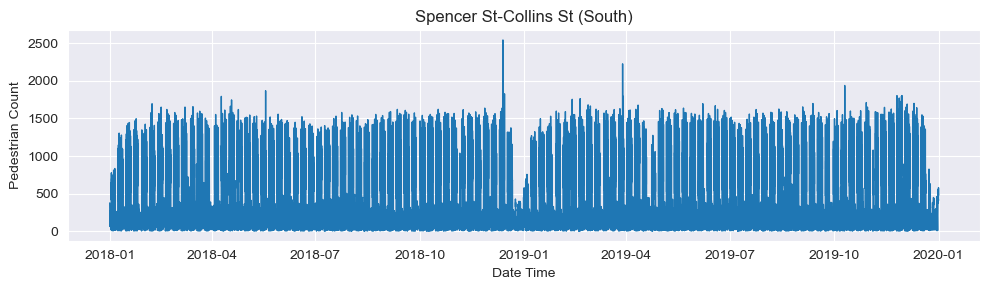

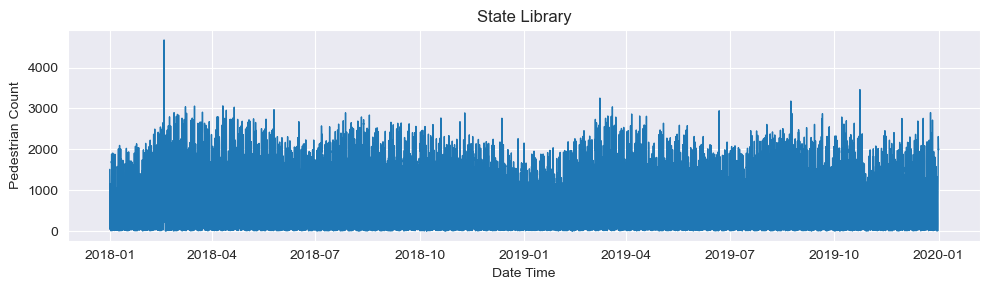

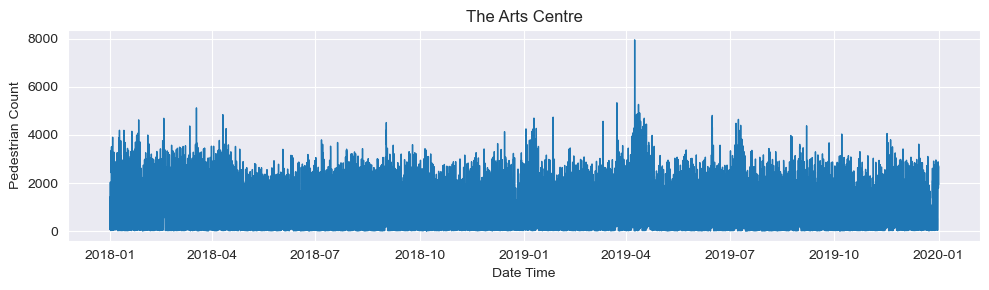

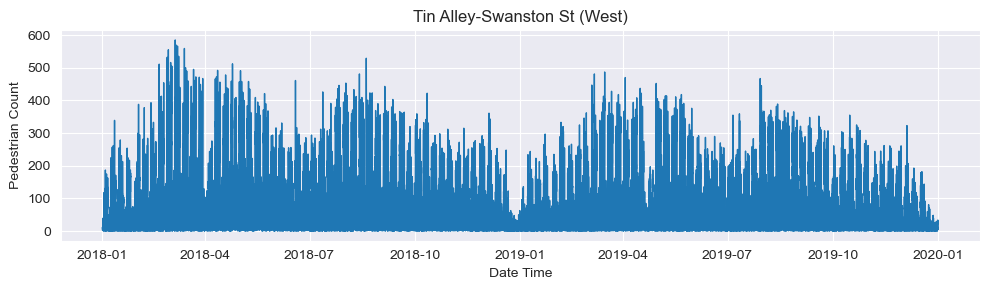

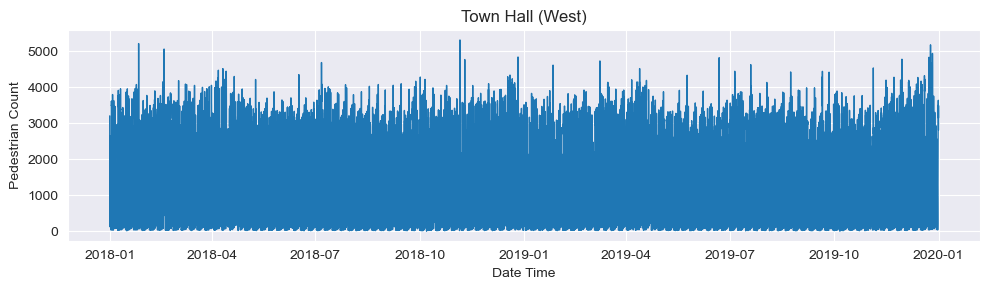

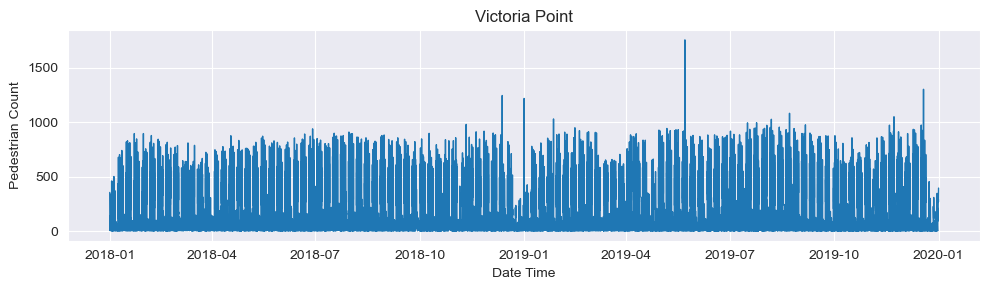

In [23]:
## Plots for publication
locations = df_long['location'].unique()
location = locations[0]

max_count = df_long['value'].max()
for location in locations:
    dd = df_long.loc[df_long['location'] == location]
    fig,ax = plt.subplots(1,1,figsize=(10,3))
    ax.plot(dd['datetime'],dd['value'],linewidth=1)
    #ax.set_ylim(0,max_count) # I am actually going to allow the scale to vary and make a note in the caption.
    ax.set_title(location)
    ax.set_xlabel('Date Time')
    ax.set_ylabel('Pedestrian Count')
    plt.tight_layout()
    plt.savefig(f"Plots/EDA/SeriesYears/{location}.pdf")
    plt.savefig(f"Plots/EDA/SeriesYears/{location}.png")

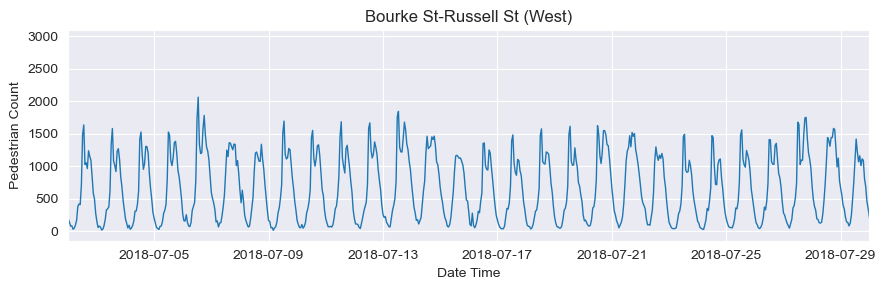

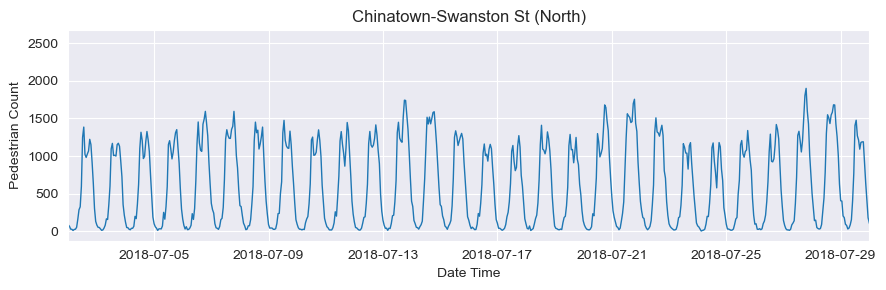

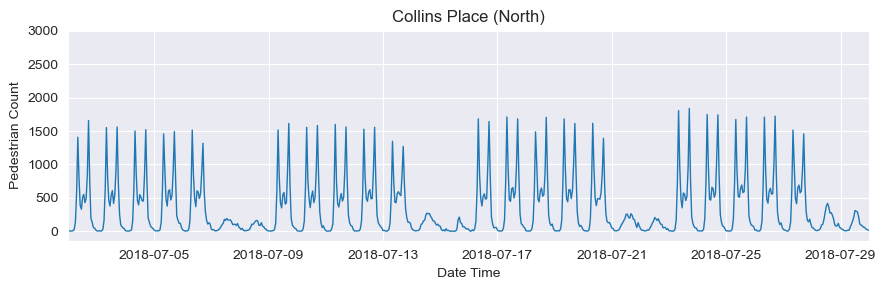

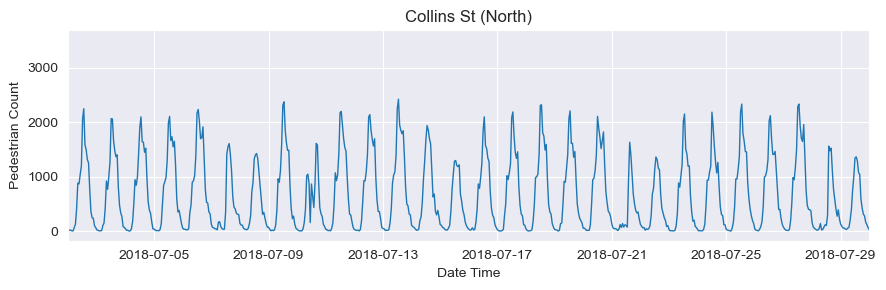

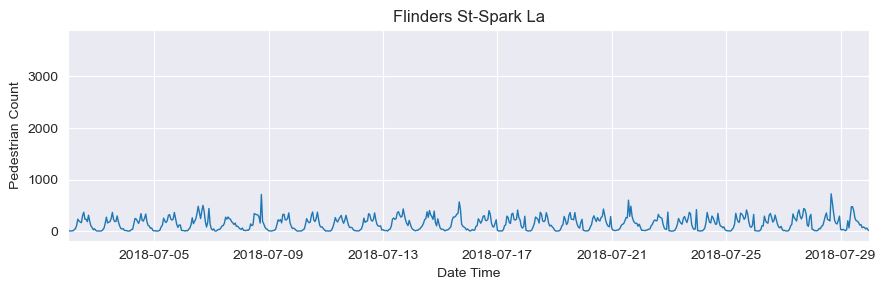

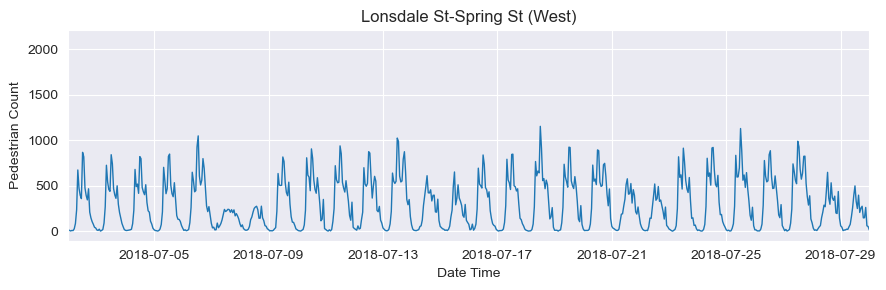

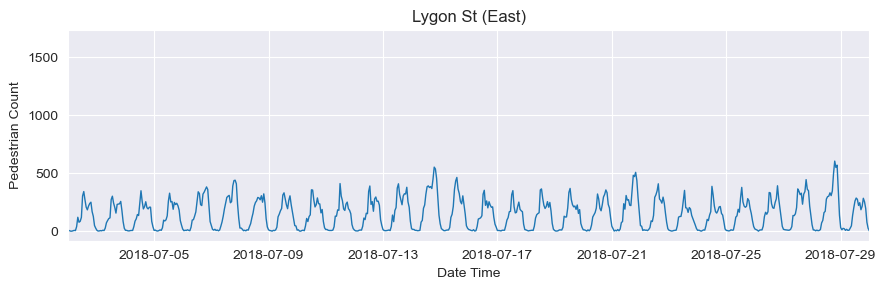

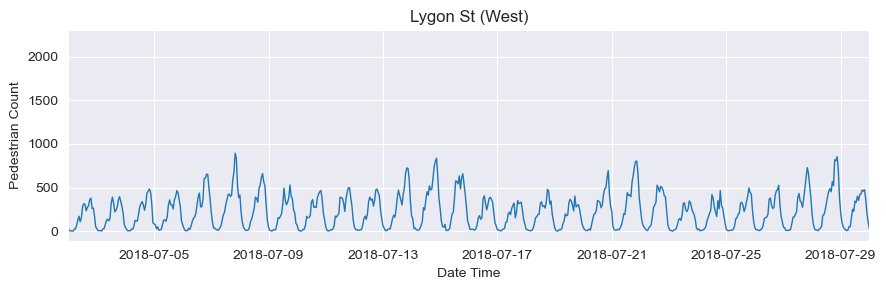

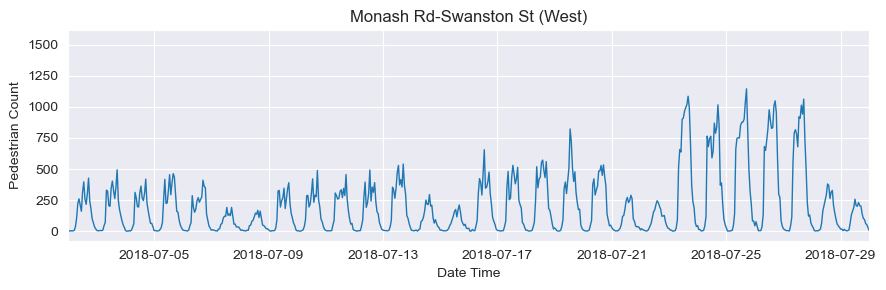

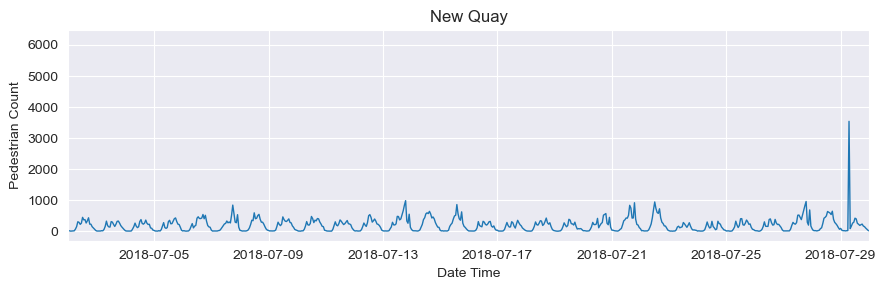

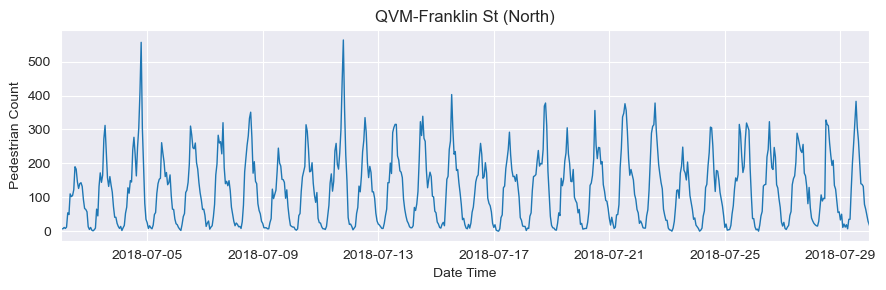

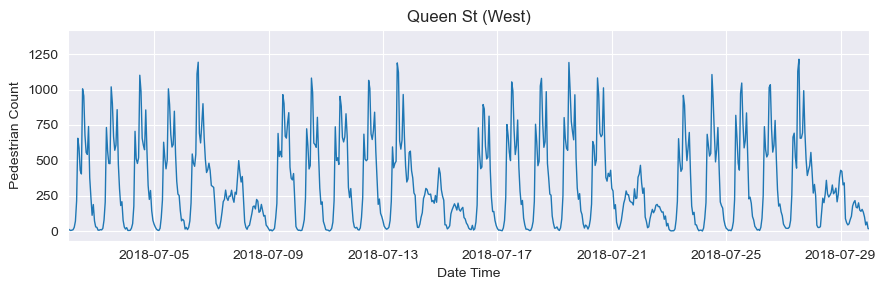

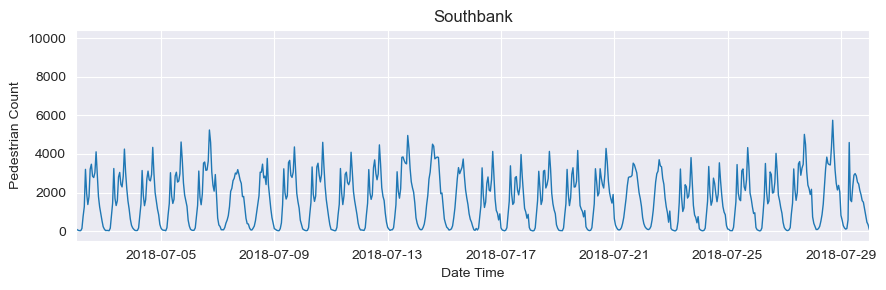

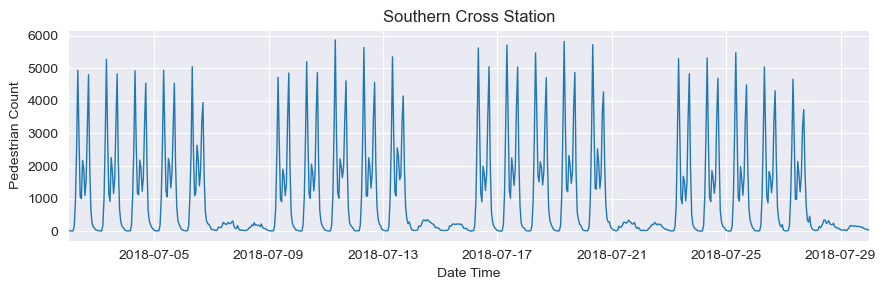

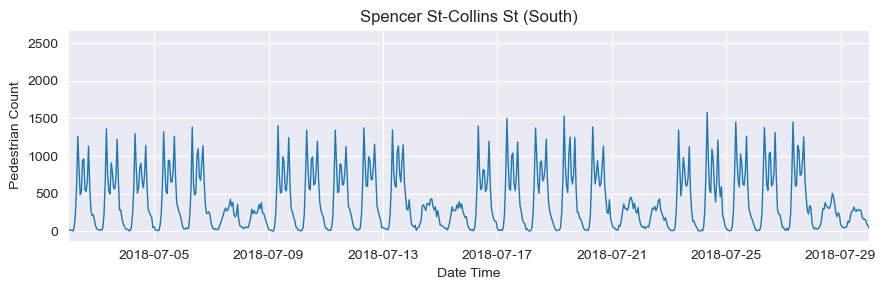

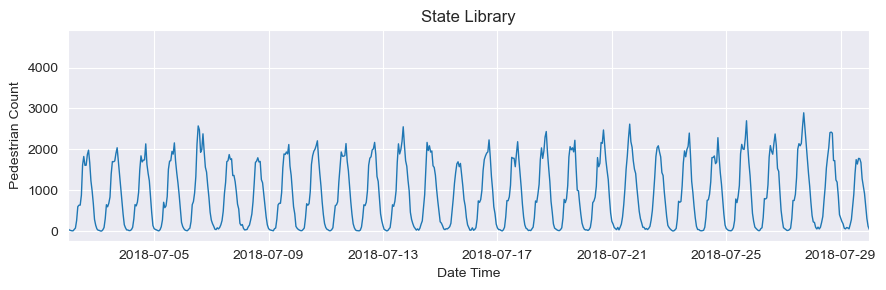

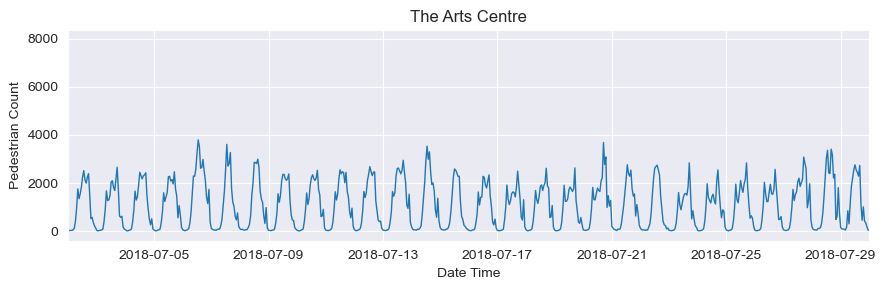

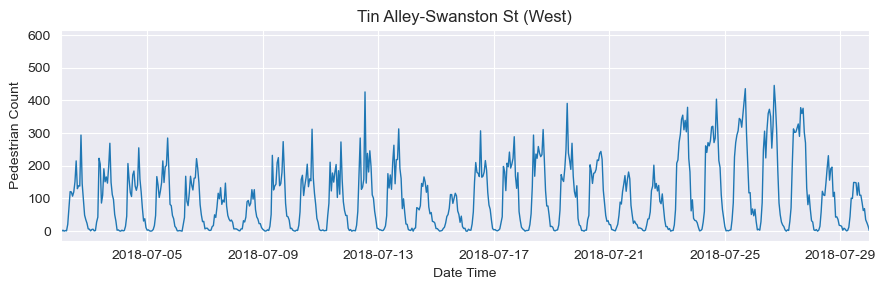

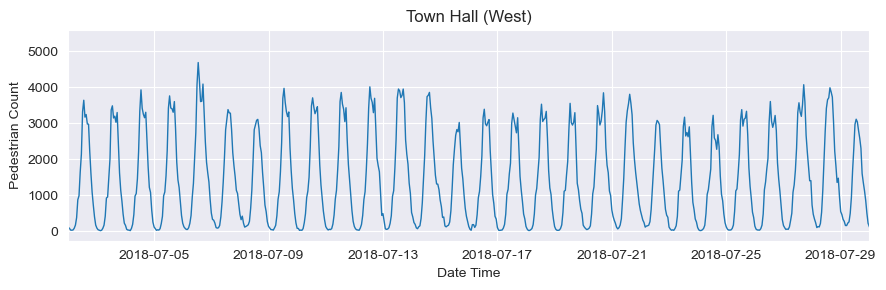

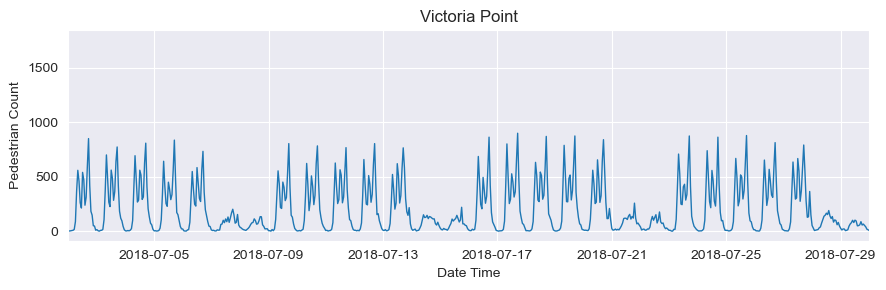

In [24]:
locations = df_long['location'].unique()
location = locations[0]

max_count = df_long['value'].max()
for location in locations:
    dd = df_long.loc[df_long['location'] == location]
    fig,ax = plt.subplots(1,1,figsize=(9,3))
    ax.plot(dd['datetime'],dd['value'],linewidth=1)
    ax.set_title(location)
    ax.set_xlabel('Date Time')
    ax.set_ylabel('Pedestrian Count')

    plot_start = pd.to_datetime('2018-07-02')  # Replace with your start date
    plot_end  = plot_start + pd.Timedelta(weeks=4)#pd.to_datetime('2018-07-28')      # Replace with your end date
    ax.set_xlim(plot_start, plot_end)
    plt.tight_layout()
    plt.savefig(f"Plots/EDA/SeriesMonth1/{location}.pdf")
    plt.savefig(f"Plots/EDA/SeriesMonth1/{location}.png")